In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load data
train = np.genfromtxt('/content/drive/MyDrive/data (2)/data/ridgetrain.txt')
test = np.genfromtxt('/content/drive/MyDrive/data (2)/data/ridgetest.txt')


In [8]:
def kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.square(x1.reshape((-1, 1)) - x2.reshape((1, -1))))


In [9]:
# Extract features and labels
x_train, y_train = train[:, 0], train[:, 1]
x_test, y_test = test[:, 0], test[:, 1]


In [10]:
lambdas = [0.1, 1, 10, 100]

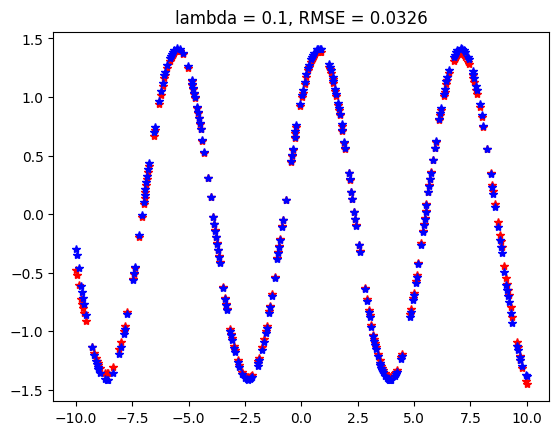

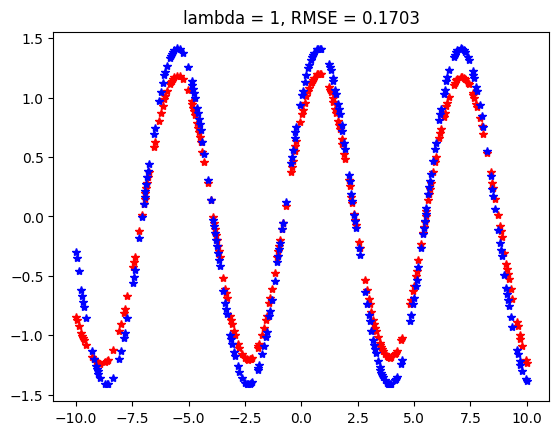

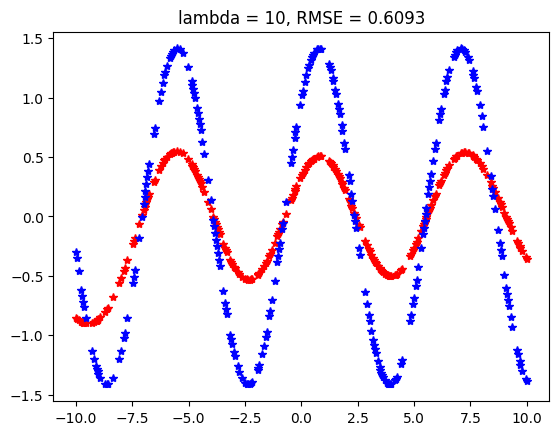

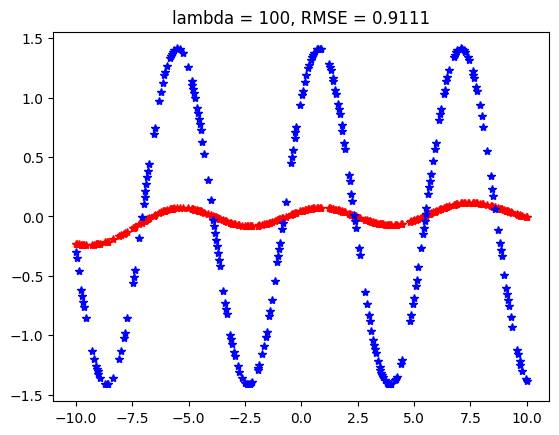

In [12]:
for lam in lambdas:
    K = kernel(x_train, x_train)
    alpha = np.linalg.solve(K + lam * np.eye(x_train.shape[0]), y_train)
    K_test = kernel(x_test, x_train)
    y_pred = K_test @ alpha
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    plt.figure()
    plt.title(f'lambda = {lam}, RMSE = {rmse:.4f}')
    plt.plot(x_test, y_pred, 'r*')
    plt.plot(x_test, y_test, 'b*')


plt.show()
